In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [82]:
df = pd.read_csv('dataset/Food_Delivery_Times.csv')
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [84]:
df['Weather'].unique()

array(['Windy', 'Clear', 'Foggy', 'Rainy', 'Snowy', nan], dtype=object)

In [85]:
df['Time_of_Day'].unique()

array(['Afternoon', 'Evening', 'Night', 'Morning', nan], dtype=object)

In [86]:
df['Vehicle_Type'].unique()

array(['Scooter', 'Bike', 'Car'], dtype=object)

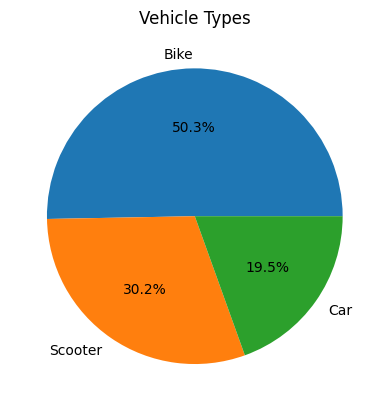

In [87]:
vt = df['Vehicle_Type'].value_counts()
plt.pie(vt, labels=vt.index, autopct='%1.1f%%')
plt.title('Vehicle Types')
plt.show()

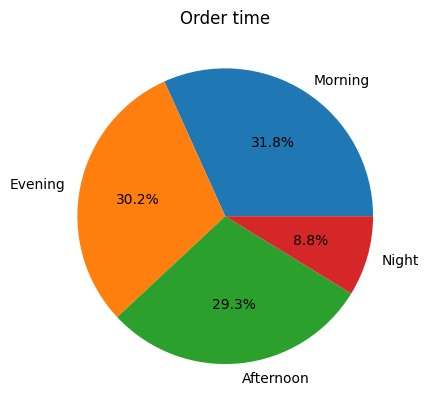

In [88]:
td = df['Time_of_Day'].value_counts()
plt.pie(td, labels=td.index, autopct='%1.1f%%')
plt.title('Order time')
plt.show()

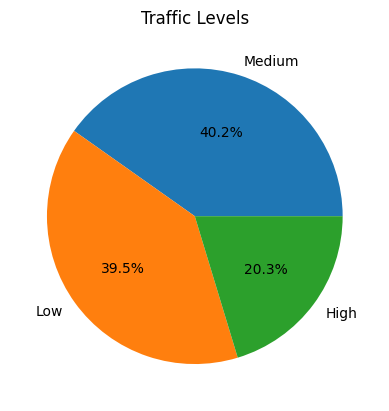

In [89]:
traffic = df['Traffic_Level'].value_counts()
plt.pie(traffic, labels=traffic.index, autopct='%1.1f%%')
plt.title('Traffic Levels')
plt.show()

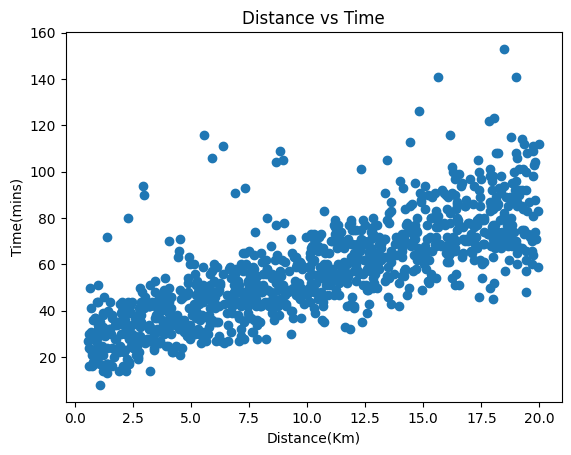

In [125]:
plt.scatter(df['Distance_km'],df['Delivery_Time_min'])
plt.xlabel('Distance(Km)')
plt.ylabel('Time(mins)')
plt.title('Distance vs Time')
plt.show()

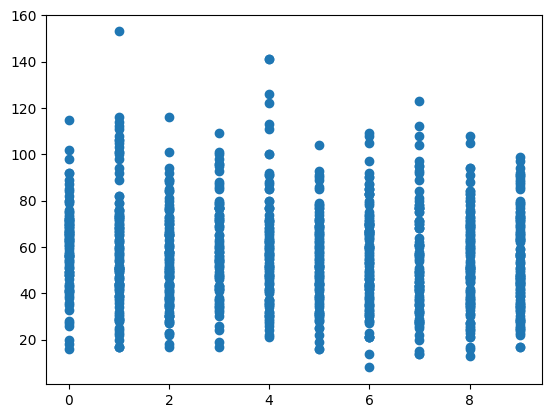

In [91]:
plt.scatter(df['Courier_Experience_yrs'],df['Delivery_Time_min'])
plt.show()

In [92]:
cat_cols = ['Weather','Traffic_Level','Time_of_Day','Vehicle_Type']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df.head()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter
0,522,7.93,12,1.0,43,False,False,False,True,True,False,False,False,False,False,True
1,738,16.42,20,2.0,84,False,False,False,False,False,True,True,False,False,False,False
2,741,9.52,28,1.0,59,True,False,False,False,True,False,False,False,True,False,True
3,661,7.44,5,1.0,37,False,True,False,False,False,True,False,False,False,False,True
4,412,19.03,16,5.0,68,False,False,False,False,True,False,False,True,False,False,False


In [93]:
df.dropna()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter
0,522,7.93,12,1.0,43,False,False,False,True,True,False,False,False,False,False,True
1,738,16.42,20,2.0,84,False,False,False,False,False,True,True,False,False,False,False
2,741,9.52,28,1.0,59,True,False,False,False,True,False,False,False,True,False,True
3,661,7.44,5,1.0,37,False,True,False,False,False,True,False,False,False,False,True
4,412,19.03,16,5.0,68,False,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,107,8.50,13,3.0,54,False,False,False,False,False,False,True,False,False,True,False
996,271,16.28,8,9.0,71,False,True,False,False,True,False,False,True,False,False,True
997,861,15.62,26,2.0,81,False,False,True,False,False,False,True,False,False,False,True
998,436,14.17,8,0.0,55,False,False,False,False,True,False,False,False,False,False,False


In [94]:
df = df.drop(columns=['Order_ID'])
df.head()

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter
0,7.93,12,1.0,43,False,False,False,True,True,False,False,False,False,False,True
1,16.42,20,2.0,84,False,False,False,False,False,True,True,False,False,False,False
2,9.52,28,1.0,59,True,False,False,False,True,False,False,False,True,False,True
3,7.44,5,1.0,37,False,True,False,False,False,True,False,False,False,False,True
4,19.03,16,5.0,68,False,False,False,False,True,False,False,True,False,False,False


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Distance_km             1000 non-null   float64
 1   Preparation_Time_min    1000 non-null   int64  
 2   Courier_Experience_yrs  970 non-null    float64
 3   Delivery_Time_min       1000 non-null   int64  
 4   Weather_Foggy           1000 non-null   bool   
 5   Weather_Rainy           1000 non-null   bool   
 6   Weather_Snowy           1000 non-null   bool   
 7   Weather_Windy           1000 non-null   bool   
 8   Traffic_Level_Low       1000 non-null   bool   
 9   Traffic_Level_Medium    1000 non-null   bool   
 10  Time_of_Day_Evening     1000 non-null   bool   
 11  Time_of_Day_Morning     1000 non-null   bool   
 12  Time_of_Day_Night       1000 non-null   bool   
 13  Vehicle_Type_Car        1000 non-null   bool   
 14  Vehicle_Type_Scooter    1000 non-null   b

In [96]:
avg = df['Courier_Experience_yrs'].mean()
df['Courier_Experience_yrs'].fillna(avg, inplace=True)

C:\Users\Maharshi\AppData\Local\Temp\ipykernel_5868\3767755336.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Courier_Experience_yrs'].fillna(avg, inplace=True)


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Distance_km             1000 non-null   float64
 1   Preparation_Time_min    1000 non-null   int64  
 2   Courier_Experience_yrs  1000 non-null   float64
 3   Delivery_Time_min       1000 non-null   int64  
 4   Weather_Foggy           1000 non-null   bool   
 5   Weather_Rainy           1000 non-null   bool   
 6   Weather_Snowy           1000 non-null   bool   
 7   Weather_Windy           1000 non-null   bool   
 8   Traffic_Level_Low       1000 non-null   bool   
 9   Traffic_Level_Medium    1000 non-null   bool   
 10  Time_of_Day_Evening     1000 non-null   bool   
 11  Time_of_Day_Morning     1000 non-null   bool   
 12  Time_of_Day_Night       1000 non-null   bool   
 13  Vehicle_Type_Car        1000 non-null   bool   
 14  Vehicle_Type_Scooter    1000 non-null   b

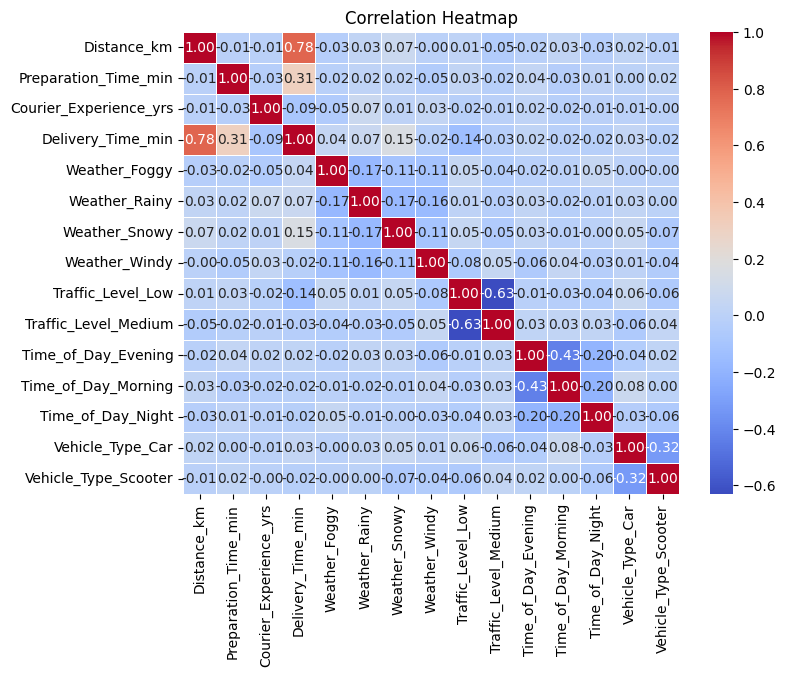

In [98]:
import seaborn as sns

corr = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

In [99]:
X = df.drop(columns=['Delivery_Time_min'])
y = df['Delivery_Time_min']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [101]:
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [102]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Train R^2:", model.score(X_train, y_train))
print("Test R^2:", model.score(X_test, y_test))

Train R^2: 0.7731163579767831
Test R^2: 0.7854114072449634


In [103]:
y_pred = model.predict(X_test)

In [104]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(f'Mean square error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Square Error: {rmse}')

Mean square error: 92.68323567768074
Mean Absolute Error: 6.405440848183131
Root Mean Square Error: 9.627213287222878


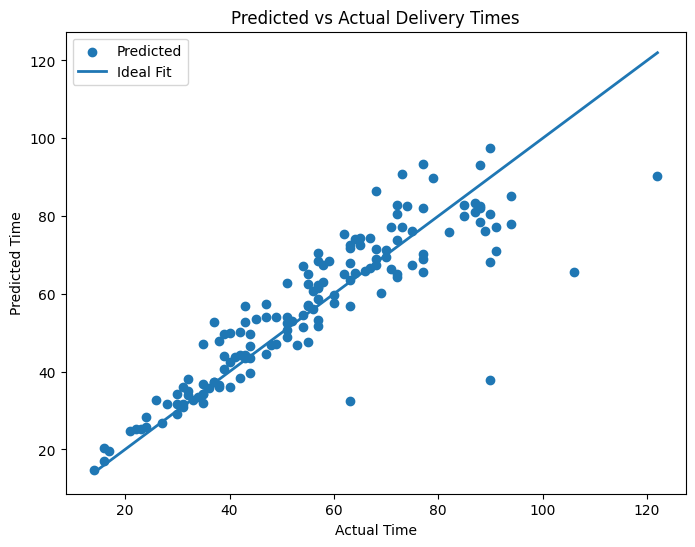

In [105]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=2, label='Ideal Fit')
plt.xlabel('Actual Time')
plt.ylabel('Predicted Time')
plt.title('Predicted vs Actual Delivery Times')
plt.legend()
plt.show()

In [108]:
import joblib
joblib.dump(model, 'models/linear_model.joblib')

['models/linear_model.joblib']

In [121]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)

elastic_net = ElasticNet(alpha=0.5)
elastic_net.fit(X_train, y_train)

ElasticNet(alpha=0.5)

In [122]:
coeff = pd.DataFrame({
    'Feature': X.columns,
    'Linear Regression': model.coef_,
    'Ridge': ridge.coef_,
    'lasso': lasso.coef_,
    'ElasticNet' : elastic_net.coef_
})

print(coeff)

                   Feature  Linear Regression      Ridge      lasso  \
0              Distance_km          17.194004  17.178236  16.460291   
1     Preparation_Time_min           7.005339   6.997224   6.104280   
2   Courier_Experience_yrs          -1.879557  -1.875339  -0.746647   
3            Weather_Foggy           6.004049   5.882324   0.000000   
4            Weather_Rainy           4.692204   4.623319   0.000000   
5            Weather_Snowy           8.853804   8.706840   0.000000   
6            Weather_Windy           1.313992   1.258633  -0.000000   
7        Traffic_Level_Low         -10.839710 -10.719635  -2.625223   
8     Traffic_Level_Medium          -5.040997  -4.952263  -0.000000   
9      Time_of_Day_Evening           0.281489   0.292832   0.000000   
10     Time_of_Day_Morning          -1.449432  -1.431548  -0.000000   
11       Time_of_Day_Night          -2.012971  -1.968240  -0.000000   
12        Vehicle_Type_Car           0.647031   0.653167   0.000000   
13    

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 1200x800 with 0 Axes>

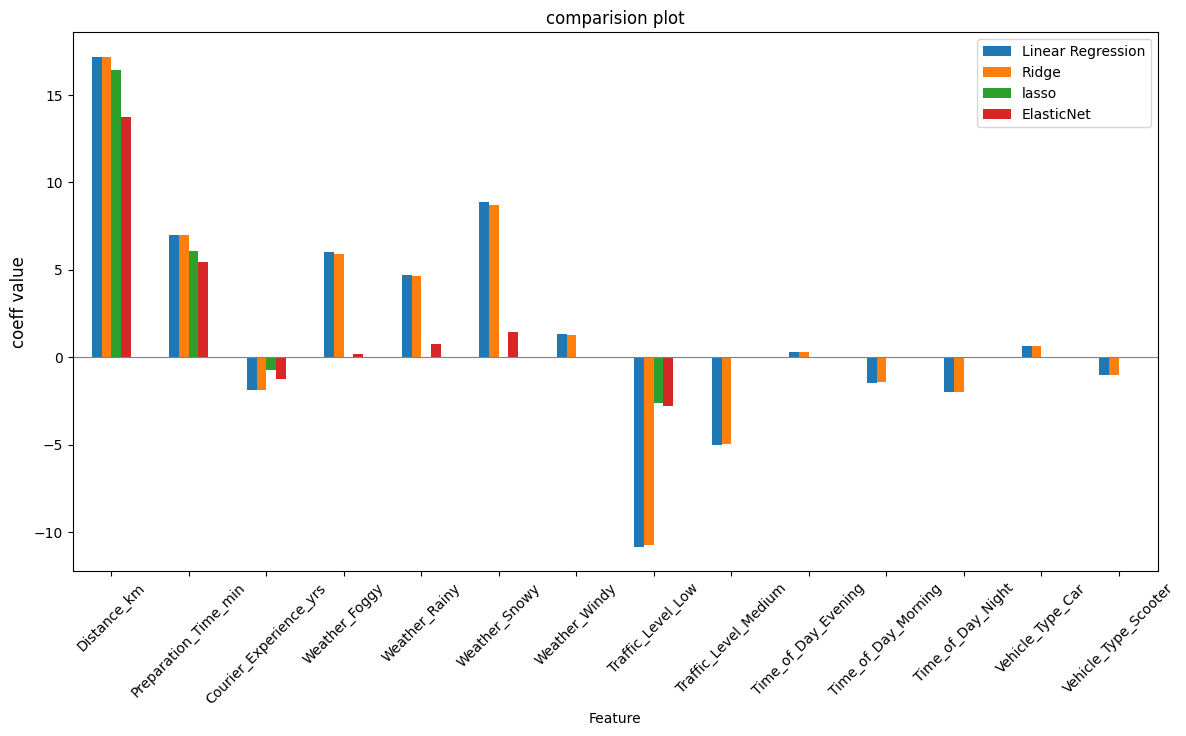

In [123]:
plt.figure(figsize=(12,8))
coeff.plot(x='Feature',y=['Linear Regression','Ridge','lasso','ElasticNet'], kind='bar',figsize=(14,7))
plt.title('comparision plot')
plt.ylabel('coeff value', fontsize=12)
plt.axhline(0, color='grey',linewidth=0.8)
plt.xticks(rotation=45)
plt.grid(axis=y, linestyle='--',alpha=0.7)
plt.tight_layout()

In [124]:
scores = {
    'Linear Regression' : model.score(X_train, y_train),
    'Ridge' : ridge.score(X_train, y_train),
    'Lasso' : lasso.score(X_train, y_train),
    'ElasticNet' : elastic_net.score(X_train, y_train)
}

print('Comparision of R^2 of different techniques: ')
print(scores)

Comparision of R^2 of different techniques: 
{'Linear Regression': 0.7731163579767831, 'Ridge': 0.7731055510991587, 'Lasso': 0.7280144874864121, 'ElasticNet': 0.7062451402174135}
